In [1]:
# Initialize Otter
import otter
grader = otter.Notebook("hw5.ipynb")

# CPSC 330 - Applied Machine Learning 

## Homework 5: Putting it all together 
### Associated lectures: All material till lecture 13 

<div class="alert-warning">
    
## Instructions  
rubric={points}

You will earn points for following these instructions and successfully submitting your work on Gradescope.  

### Before you start  

- Please **read carefully
[Use of Generative AI policy](https://ubc-cs.github.io/cpsc330-2025W2/syllabus#use-of-generative-ai-in-the-course)** before starting the homework assignment. 
  
- Review the [CPSC 330 homework instructions](https://ubc-cs.github.io/cpsc330-2025W2/docs/homework-instructions) for detailed guidance on completing and submitting assignments. 

### Group work instructions

**You may work with a partner on this homework and submit your assignment as a group.** Below are some instructions on working as a group.  
- The maximum group size is 2.
  
- Use group work as an opportunity to collaborate and learn new things from each other. 
- Be respectful to each other and make sure you understand all the concepts in the assignment well. 
- It's your responsibility to make sure that the assignment is submitted by one of the group members before the deadline. 
- You can find the instructions on how to do group submission on Gradescope [here](https://help.gradescope.com/article/m5qz2xsnjy-student-add-group-members).
- If you would like to use late tokens for the homework, all group members must have the necessary late tokens available. Please note that the late tokens will be counted for all members of the group.   
### Before submitting  

- **Run all cells** (▶▶ button) to ensure the notebook executes cleanly from top to bottom.

  - Execution counts must start at **1** and be sequential.
    
  - Notebooks with missing outputs or errors may lose marks.

- **Do not upload or push data files** used in this lab to GitHub or Gradescope. (A `.gitignore` is provided to prevent this.)  


### Submitting on Gradescope  

- Upload **only** your `.ipynb` file (with outputs shown) and any required output files. Do **not** submit extra files.
  
- If needed, refer to the [Gradescope Student Guide](https://lthub.ubc.ca/guides/gradescope-student-guide/).  
- If your notebook is too large to render, also upload a **Web PDF** or **HTML** version.  
  - You can create one using **File $\rightarrow$ Save and Export Notebook As**.  
  - If you get an error when creating a PDF, try running the following commands in your lab directory:  

    ```bash
    conda install -c conda-forge nbconvert-playwright
    jupyter nbconvert --to webpdf lab1.ipynb
    ```  

  - Ensure all outputs are visible in your PDF or HTML file; TAs cannot grade your work if outputs are missing.

</div>


_Note: Unlike previous assignments, this one is open-ended and project-style. Treat it as an opportunity to explore, experiment, and learn._

<!-- BEGIN QUESTION -->

## Imports

<div class="alert alert-warning">
    
Imports
    
</div>

_Points:_ 0

In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler
from sklearn.compose import make_column_transformer
from sklearn.dummy import DummyRegressor, DummyClassifier
from sklearn.linear_model import LogisticRegression, Ridge
from sklearn.model_selection import (
    train_test_split,
    cross_val_score,
    cross_validate,
    GridSearchCV,
    RandomizedSearchCV,
    StratifiedKFold
)
from sklearn.feature_selection import RFECV
from sklearn.ensemble import RandomForestClassifier

from scipy.stats import lognorm, loguniform, randint, uniform

from xgboost import XGBClassifier
from lightgbm.sklearn import LGBMClassifier

In [3]:
import warnings

warnings.simplefilter(action="ignore", category=FutureWarning)

<!-- END QUESTION -->

## Introduction

In this homework you will be working on an open-ended mini-project, where you will put all the different things you have learned so far together to solve an interesting problem.

A few notes and tips when you work on this mini-project: 

#### Tips
1. This mini-project is open-ended, and while working on it, there might be some situations where you'll have to use your own judgment and make your own decisions (as you would be doing when you work as a data scientist). Make sure you explain your decisions whenever necessary. 
2. **Do not include everything you ever tried in your submission** -- it's fine just to have your final code. That said, your code should be reproducible and well-documented. For example, if you chose your hyperparameters based on some hyperparameter optimization experiment, you should leave in the code for that experiment so that someone else could re-run it and obtain the same hyperparameters, rather than mysteriously just setting the hyperparameters to some (carefully chosen) values in your code. 
3. If you realize that you are repeating a lot of code try to organize it in functions. Clear presentation of your code, experiments, and results is the key to be successful in this lab. You may use code from lecture notes or previous lab solutions with appropriate attributions. 

#### Assessment
We plan to grade fairly and leniently. We don't have some secret target score that you need to achieve to get a good grade. **You'll be assessed on demonstration of mastery of course topics, clear presentation, and the quality of your analysis and results.** For example, if you just have a bunch of code and no text or figures, that's not good. If you do a bunch of sane things and get a lower accuracy than your friend, don't sweat it.


#### A final note
Finally, this style of this "project" question is different from other assignments. It'll be up to you to decide when you're "done" -- in fact, this is one of the hardest parts of real projects. But please don't spend WAY too much time on this... perhaps "a few hours" (10-14 hours???) is a good guideline for this project . Of course if you're having fun you're welcome to spend as much time as you want! But, if so, try not to do it out of perfectionism or getting the best possible grade. Do it because you're learning and enjoying it. Students from the past cohorts have found such kind of labs useful and fun and I hope you enjoy it as well. 

<br><br>

<!-- BEGIN QUESTION -->

## 1. Pick your problem and explain the prediction problem
<hr>
rubric={points:3}

In this mini project, you have the option to choose on which dataset you will be working on. The tasks you will need to carry on will be similar, independently of your choice.

### Option 1
You can choose to work on a classification problem of predicting whether a credit card client will default or not. 
For this problem, you will use [Default of Credit Card Clients Dataset](https://www.kaggle.com/uciml/default-of-credit-card-clients-dataset). In this data set, there are 30,000 examples and 24 features, and the goal is to estimate whether a person will default (fail to pay) their credit card bills; this column is labeled "default.payment.next.month" in the data. The rest of the columns can be used as features. You may take some ideas and compare your results with [the associated research paper](https://www.sciencedirect.com/science/article/pii/S0957417407006719), which is available through [the UBC library](https://www.library.ubc.ca/). 


### Option 2
You can choose to work on a regression problem using a [dataset](https://www.kaggle.com/dgomonov/new-york-city-airbnb-open-data) of New York City Airbnb listings from 2019. As usual, you'll need to start by downloading the dataset, then you will try to predict `reviews_per_month`, as a proxy for the popularity of the listing. Airbnb could use this sort of model to predict how popular future listings might be before they are posted, perhaps to help guide hosts create more appealing listings. In reality they might instead use something like vacancy rate or average rating as their target, but we do not have that available here.

> Note there is an updated version of this dataset with more features available [here](http://insideairbnb.com/). The features were are using in `listings.csv.gz` for the New York city datasets. You will also see some other files like `reviews.csv.gz`. For your own interest you may want to explore the expanded dataset and try your analysis there. However, please submit your results on the dataset obtained from Kaggle.


<div class="alert alert-info">
    
**Your tasks:**

1. Review the available datasets and choose the one you find most interesting. It may help to read through the dataset documentation on Kaggle before deciding.
2. Once you've selected a dataset, take time to understand the problem it represents and the meaning of each feature. Use the Kaggle documentation to guide you.
3. Download the dataset and load it into a pandas DataFrame.
4. Write a few sentences summarizing your initial thoughts about the problem and the dataset.
   
</div>

<div class="alert alert-warning">
    
Solution_1
    
</div>

_Points:_ 3

We are dealing with a binary classfication problem right here. Seems like the dataset has a decent size of roughly 30k examples. There is a small amount of features (25 columns before dropping). All of the features are numerical features despite some seems like they should be categorical like sex and marriage, they probably shouldn't be ordinal so I may need some preprocessing to represent them properly. Am interested in seeing how much weight the model would assign to different months in LogisticalRegression for example.

In [4]:
df = pd.read_csv("./data/UCI_Credit_Card.csv")

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 2. Data splitting
<hr>
rubric={points:2}

<div class="alert alert-info">
    
**Your tasks:**

1. Split the data into train (70%) and test (30%) portions with `random_state=123`.

> If your computer cannot handle training on 70% training data, make the test split bigger.

</div>

<div class="alert alert-warning">
    
Solution_2
    
</div>

_Points:_ 2

In [5]:
train_df, test_df = train_test_split(df, test_size=0.3, random_state=123)

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 3. EDA
<hr>
rubric={points:10}

<div class="alert alert-info">

**Your tasks:**

1. **Perform exploratory data analysis (EDA)**: Conduct an initial exploration of the training set to better understand its characteristics.

2. **Summarize and visualize the data**: Include at least **two summary statistics** and **two visualizations** that you find informative. For each, write **one sentence** explaining what insight it provides.

3. **Record your observations**: Summarize your **initial observations** about the dataset based on your EDA.

4. **Select evaluation metrics**: Choose one or more **appropriate metrics** for assessing model performance and briefly justify your choice.

</div>

<div class="alert alert-warning">
    
Solution_3
    
</div>

_Points:_ 10

_Type your answer here, replacing this text._

In [6]:
train_df.shape

(21000, 25)

In [7]:
train_df.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
count,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,...,21000.000000,21000.000000,21000.000000,21000.000000,2.100000e+04,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000
mean,14962.348238,167880.651429,1.600762,1.852143,1.554000,35.500810,-0.015429,-0.137095,-0.171619,-0.225238,...,43486.610905,40428.518333,38767.202667,5673.585143,5.895027e+03,5311.432286,4774.021381,4751.850095,5237.762190,0.223238
std,8650.734050,130202.682167,0.489753,0.792961,0.521675,9.212644,1.120465,1.194506,1.196123,1.168556,...,64843.303993,61187.200817,59587.689549,17033.241454,2.180143e+04,18377.997079,15434.136142,15228.193125,18116.846563,0.416427
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-50616.000000,-61372.000000,-339603.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7498.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2293.750000,1739.500000,1215.750000,1000.000000,8.200000e+02,390.000000,266.000000,234.000000,110.750000,0.000000
50%,14960.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19102.500000,18083.000000,16854.500000,2100.000000,2.007000e+03,1809.500000,1500.000000,1500.000000,1500.000000,0.000000
75%,22458.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54763.250000,50491.000000,49253.750000,5007.250000,5.000000e+03,4628.500000,4021.250000,4016.000000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.227082e+06,896040.000000,621000.000000,426529.000000,528666.000000,1.000000


Interesting thing I'm noticing is that amount of previous payment has a min value of -2, what does that mean? The dataset description did not encode -2 with a meaning so I need to do something about this.

In [8]:
train_df.info()

<class 'pandas.DataFrame'>
Index: 21000 entries, 16395 to 19966
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          21000 non-null  int64  
 1   LIMIT_BAL                   21000 non-null  float64
 2   SEX                         21000 non-null  int64  
 3   EDUCATION                   21000 non-null  int64  
 4   MARRIAGE                    21000 non-null  int64  
 5   AGE                         21000 non-null  int64  
 6   PAY_0                       21000 non-null  int64  
 7   PAY_2                       21000 non-null  int64  
 8   PAY_3                       21000 non-null  int64  
 9   PAY_4                       21000 non-null  int64  
 10  PAY_5                       21000 non-null  int64  
 11  PAY_6                       21000 non-null  int64  
 12  BILL_AMT1                   21000 non-null  float64
 13  BILL_AMT2                   21000 non-null 

Confirmed my initial thoughts, all columns are numerical with no missing values. We don't need to drop any rows since the prediction target doesn't have missing values which is awesome!

In [9]:
train_df["default.payment.next.month"].value_counts()

default.payment.next.month
0    16312
1     4688
Name: count, dtype: int64

From what we learned in lecture, we need to take class imbalance into account. 
From this summary statistic, upon looking at our prediction target, it seems like there is indeed a class imbalance. We would have to deal with that...

array([[<Axes: title={'center': 'ID'}>,
        <Axes: title={'center': 'LIMIT_BAL'}>,
        <Axes: title={'center': 'SEX'}>,
        <Axes: title={'center': 'EDUCATION'}>,
        <Axes: title={'center': 'MARRIAGE'}>],
       [<Axes: title={'center': 'AGE'}>,
        <Axes: title={'center': 'PAY_0'}>,
        <Axes: title={'center': 'PAY_2'}>,
        <Axes: title={'center': 'PAY_3'}>,
        <Axes: title={'center': 'PAY_4'}>],
       [<Axes: title={'center': 'PAY_5'}>,
        <Axes: title={'center': 'PAY_6'}>,
        <Axes: title={'center': 'BILL_AMT1'}>,
        <Axes: title={'center': 'BILL_AMT2'}>,
        <Axes: title={'center': 'BILL_AMT3'}>],
       [<Axes: title={'center': 'BILL_AMT4'}>,
        <Axes: title={'center': 'BILL_AMT5'}>,
        <Axes: title={'center': 'BILL_AMT6'}>,
        <Axes: title={'center': 'PAY_AMT1'}>,
        <Axes: title={'center': 'PAY_AMT2'}>],
       [<Axes: title={'center': 'PAY_AMT3'}>,
        <Axes: title={'center': 'PAY_AMT4'}>,
        <A

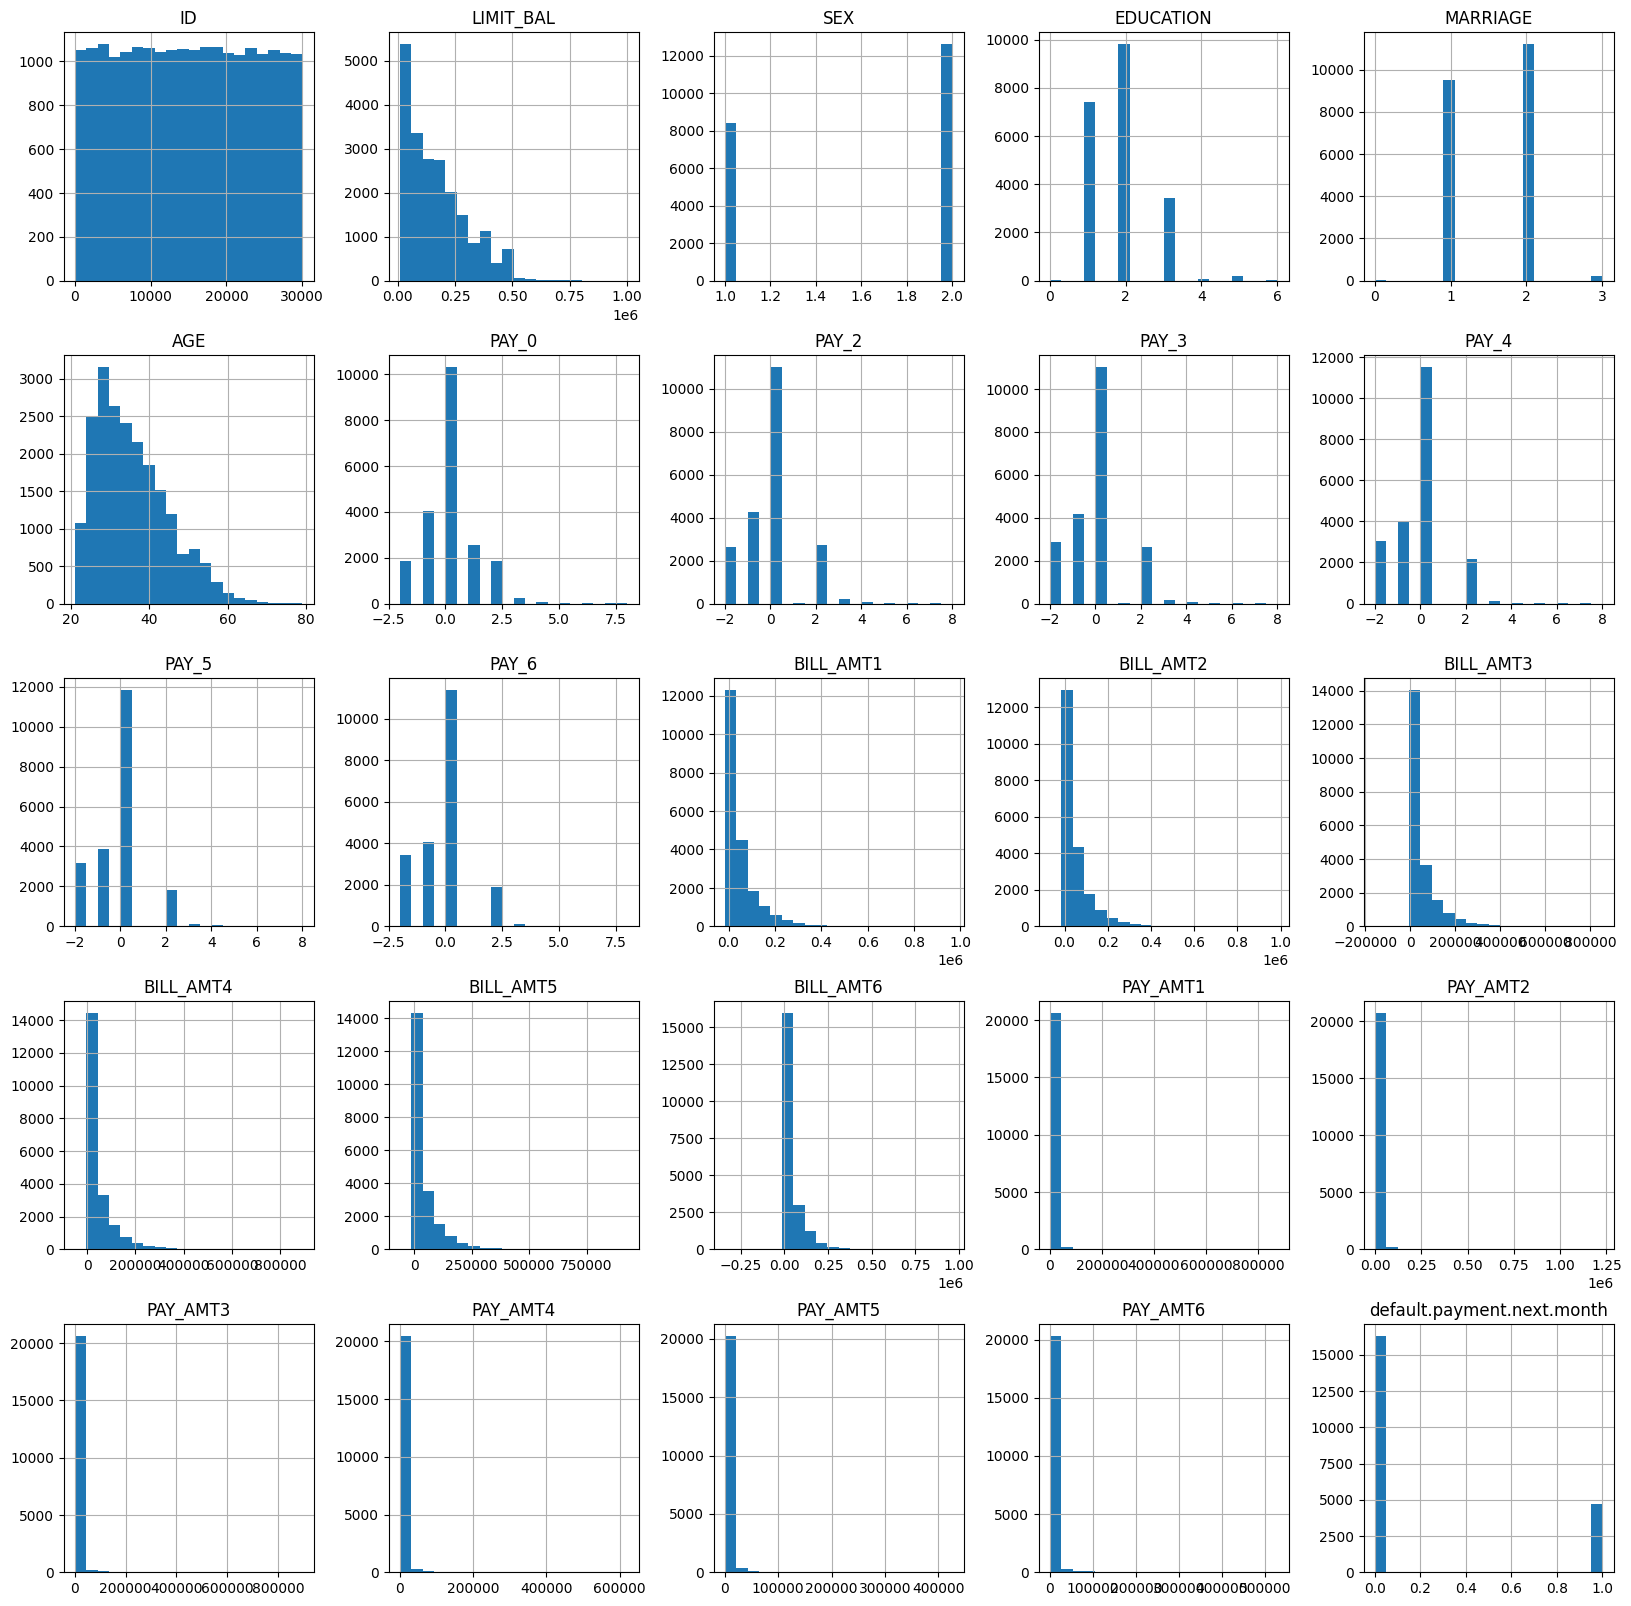

In [10]:
train_df.hist(figsize=(20, 20), bins=20)

From this visualization we can confirm the class imbalance visually. We also notice that there's outliers in the repayment status columns, education and marriage. Age is also right skewed so there's more young people in the dataset than older people. A slight imbalance in sex as well.

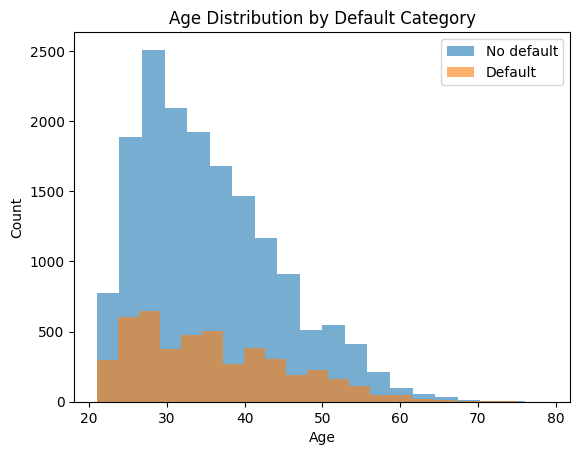

In [11]:
no_default = train_df.loc[train_df['default.payment.next.month'] == 0, 'AGE']
defaulted  = train_df.loc[train_df['default.payment.next.month'] == 1, 'AGE']

plt.hist(no_default, bins=20, alpha=0.6, label='No default')
plt.hist(defaulted,  bins=20, alpha=0.6, label='Default')
plt.title("Age Distribution by Default Category")
plt.xlabel("Age")
plt.ylabel("Count")
plt.legend()
plt.show()

From this visualization seems like Age just by itself isn't strongly correlated to whether a default would happen.

For evaluation metric, I would use $f1$ score since it combines precision and recall. However I believe that classifying both classes properly as just as important, since the data is heavily imbalanced, I would use the macro average $f1$ score as our evaluation metric here so it weighs both classes equally.

### Summary

- This dataset has a class imbalance that we need to address.
- The numerical features would need proper scaling to ensure the ranges are similar.
- Outliers exist in multiple features, including some potential error values such as the -2 in the repayment status.
- We choose macro avg $f1$ as our evaluation metric as it combines precision and recall while putting an equal weight on the 2 prediction classes, so they contributr equally to our model performance.
- There are unknown values in education, we need to figure out a way to deal with them too.

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 4. Feature engineering
<hr>
rubric={points:1}

<div class="alert alert-info">
    
**Your tasks:**

1. **Perform feature engineering**: Create new features that are relevant to the problem and use this updated feature set in the following exercises. You may need to iterate between **feature engineering** and **preprocessing** to refine your features and improve model performance.
   
</div>

<div class="alert alert-warning">
    
Solution_4
    
</div>

_Points:_ 1

I want to make features that represents the proportion of the credit limit being used per month. This could be useful since it normalizes the bill amount based on the limit given to each person instead of purely relying on raw amount to determine whether a default would happen.

In [12]:
for i in range(1, 7):
    train_df[f'UTILIZATION_{i}'] = train_df[f'BILL_AMT{i}'] / (train_df['LIMIT_BAL'] + 1e-6)

In [13]:
X_train, y_train = train_df.drop(columns=["default.payment.next.month"]), train_df["default.payment.next.month"]
X_test, y_test = test_df.drop(columns=["default.payment.next.month"]), test_df["default.payment.next.month"]

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 5. Preprocessing and transformations
<hr>
rubric={points:10}

<div class="alert alert-info">
    
**Your tasks:**

1. **Identify feature types**: Determine the different types of features in your dataset (e.g., numerical, categorical, ordinal, text) and specify the transformations you would apply to each type.

2. **Define a column transformer (if needed)**: Implement a `ColumnTransformer` to apply the appropriate preprocessing steps to each feature type.
 
</div>

<div class="alert alert-warning">
    
Solution_5
    
</div>

_Points:_ 10

In [14]:
prediction_target = "default.payment.next.month"
binary_features = ["SEX"]
numeric_features = [
    "LIMIT_BAL",
    "PAY_0",
    "PAY_2",
    "PAY_3",
    "PAY_4",
    "PAY_5",
    "PAY_6",
    "BILL_AMT1",
    "BILL_AMT2",
    "BILL_AMT3",
    "BILL_AMT4",
    "BILL_AMT5",
    "BILL_AMT6",
    "UTILIZATION_1",
    "UTILIZATION_2",
    "UTILIZATION_3",
    "UTILIZATION_4",
    "UTILIZATION_5",
    "UTILIZATION_6",
    "PAY_AMT1",
    "PAY_AMT2",
    "PAY_AMT3",
    "PAY_AMT4",
    "PAY_AMT5",
    "PAY_AMT6",
    "AGE"
]

categorical_features = ["EDUCATION", "MARRIAGE"]
drop_features = ["ID"]

In [15]:
preprocessor = make_column_transformer(
    ("drop", drop_features),
    (StandardScaler(), numeric_features),
    (OneHotEncoder(drop="if_binary"), binary_features),
    (OneHotEncoder(handle_unknown="ignore"), categorical_features),
)

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 6. Baseline model
<hr>
rubric={points:2}

<div class="alert alert-info">
    
**Your tasks:**

1. **Establish a baseline**: Use one of `scikit-learn`’s baseline models (e.g., `DummyClassifier` or `DummyRegressor`, depending on your task) and report the results. This will serve as a reference point for evaluating the performance of your more advanced models.

</div>

<div class="alert alert-warning">
    
Solution_6
    
</div>

_Points:_ 2

In [16]:
results = pd.DataFrame()

In [17]:
# From Lecture 5
def mean_std_cross_val_scores(model, X_train, y_train, **kwargs):
    """
    Returns mean and std of cross validation

    Parameters
    ----------
    model :
        scikit-learn model
    X_train : numpy array or pandas DataFrame
        X in the training data
    y_train :
        y in the training data

    Returns
    ----------
        pandas Series with mean scores from cross_validation
    """

    scores = cross_validate(model, X_train, y_train, **kwargs)

    mean_scores = pd.DataFrame(scores).mean()
    std_scores = pd.DataFrame(scores).std()
    out_col = []

    for i in range(len(mean_scores)):
        out_col.append((f"%0.3f (+/- %0.3f)" % (mean_scores.iloc[i], std_scores.iloc[i])))

    return pd.Series(data=out_col, index=mean_scores.index)

In [18]:
dummy = DummyClassifier(strategy="stratified")
# cv = pd.DataFrame(cross_validate(dummy, X_train, y_train, return_train_score=True, scoring="f1_macro"))
# summary = cv.agg(["mean", "std"]).T
# summary
results["baseline"] = mean_std_cross_val_scores(dummy, X_train, y_train, return_train_score=True, scoring="f1_macro")
results

,baseline
fit_time,0.003 (+/- 0.001)
score_time,0.001 (+/- 0.001)
test_score,0.498 (+/- 0.006)
train_score,0.500 (+/- 0.002)


<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 7. Linear models 
<hr>
rubric={points:10}

<div class="alert alert-info">
    
**Your tasks:**

1. **Train a linear model**: Use a linear model as your first real attempt at solving the problem.

2. **Tune hyperparameters**: Perform hyperparameter tuning to explore different values of the model's complexity parameter. 

3. **Evaluate with cross-validation**: Report the cross-validation scores along with their standard deviation.

4. **Summarize findings**: Summarize your results, highlighting key observations from your experiments.

</div>

<div class="alert alert-warning">
    
Solution_7
    
</div>

_Points:_ 10

In [19]:
pipe_lr = make_pipeline(preprocessor, LogisticRegression(max_iter=500, class_weight="balanced"))

In [20]:
# cv = pd.DataFrame(cross_validate(pipe_lr, X_train, y_train, return_train_score=True, scoring="f1_macro"))
# summary = cv.agg(["mean", "std"]).T
# summary
results["logistic regression"] = mean_std_cross_val_scores(pipe_lr, X_train, y_train, return_train_score=True, scoring="f1_macro")
results

,baseline,logistic regression
fit_time,0.003 (+/- 0.001),0.039 (+/- 0.003)
score_time,0.001 (+/- 0.001),0.003 (+/- 0.000)
test_score,0.498 (+/- 0.006),0.634 (+/- 0.007)
train_score,0.500 (+/- 0.002),0.636 (+/- 0.004)


In [21]:
params  = {"logisticregression__C": loguniform(1e-4, 1e5)}
random_search = RandomizedSearchCV(
    pipe_lr,
    params,
    n_iter=50,
    n_jobs=1,
    scoring="f1_macro",
    random_state=123,
    return_train_score=True,
)

random_search.fit(X_train, y_train)

,"estimator estimator: estimator objectAn object of that type is instantiated for each grid point.This is assumed to implement the scikit-learn estimator interface.Either estimator needs to provide a ``score`` function,or ``scoring`` must be passed.",Pipeline(step...x_iter=500))])
,"param_distributions param_distributions: dict or list of dictsDictionary with parameters names (`str`) as keys and distributionsor lists of parameters to try. Distributions must provide a ``rvs``method for sampling (such as those from scipy.stats.distributions).If a list is given, it is sampled uniformly.If a list of dicts is given, first a dict is sampled uniformly, andthen a parameter is sampled using that dict as above.",{'logisticregression__C': <scipy.stats....t 0x13f2d9f10>}
,"n_iter n_iter: int, default=10Number of parameter settings that are sampled. n_iter tradesoff runtime vs quality of the solution.",50
,"scoring scoring: str, callable, list, tuple or dict, default=NoneStrategy to evaluate the performance of the cross-validated model onthe test set.If `scoring` represents a single score, one can use:- a single string (see :ref:`scoring_string_names`);- a callable (see :ref:`scoring_callable`) that returns a single value;- `None`, the `estimator`'s :ref:`default evaluation criterion ` is used.If `scoring` represents multiple scores, one can use:- a list or tuple of unique strings;- a callable returning a dictionary where the keys are the metric names and the values are the metric scores;- a dictionary with metric names as keys and callables as values.See :ref:`multimetric_grid_search` for an example.If None, the estimator's score method is used.",'f1_macro'
,"n_jobs n_jobs: int, default=NoneNumber of jobs to run in parallel.``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.``-1`` means using all processors. See :term:`Glossary `for more details... versionchanged:: v0.20 `n_jobs` default changed from 1 to None",1
,"refit refit: bool, str, or callable, default=TrueRefit an estimator using the best found parameters on the wholedataset.For multiple metric evaluation, this needs to be a `str` denoting thescorer that would be used to find the best parameters for refittingthe estimator at the end.Where there are considerations other than maximum score inchoosing a best estimator, ``refit`` can be set to a function whichreturns the selected ``best_index_`` given the ``cv_results_``. In thatcase, the ``best_estimator_`` and ``best_params_`` will be setaccording to the returned ``best_index_`` while the ``best_score_``attribute will not be available.The refitted estimator is made available at the ``best_estimator_``attribute and permits using ``predict`` directly on this``RandomizedSearchCV`` instance.Also for multiple metric evaluation, the attributes ``best_index_``,``best_score_`` and ``best_params_`` will only be available if``refit`` is set and all of them will be determined w.r.t this specificscorer.See ``scoring`` parameter to know more about multiple metricevaluation.See :ref:`this example`for an example of how to use ``refit=callable`` to balance modelcomplexity and cross-validated score... versionchanged:: 0.20 Support for callable added.",True
,"cv cv: int, cross-validation generator or an iterable, default=NoneDetermines the cross-validation splitting strategy.Possible inputs for cv are:- None, to use the default 5-fold cross validation,- integer, to specify the number of folds in a `(Stratified)KFold`,- :term:`CV splitter`,- An iterable yielding (train, test) splits as arrays of indices.For integer/None inputs, if the estimator is a classifier and ``y`` iseither binary or multiclass, :class:`StratifiedKFold` is used. In allother cases, :class:`KFold` is used. These splitters are instantiatedwith `shuffle=False` so the splits will be the same across calls.Refer :ref:`User Guide ` for the variouscross-validation strategies that can be used here... versionchanged:: 0.22 ``cv`` default value if None changed from 3-fold to

In [22]:
print("Best params:", random_search.best_params_)
print("Best score: ", random_search.best_score_)

Best params: {'logisticregression__C': np.float64(0.004389606336284961)}
Best score:  0.6361528415525652


In [23]:
# cv = pd.DataFrame(cross_validate(random_search.best_estimator_, X_train, y_train, return_train_score=True, scoring="f1_macro"))
# summary = cv.agg(["mean", "std"]).T
# summary
results["logistic regression tuned"] = mean_std_cross_val_scores(random_search.best_estimator_, X_train, y_train, return_train_score=True, scoring="f1_macro")
results

,baseline,logistic regression,logistic regression tuned
fit_time,0.003 (+/- 0.001),0.039 (+/- 0.003),0.030 (+/- 0.008)
score_time,0.001 (+/- 0.001),0.003 (+/- 0.000),0.004 (+/- 0.000)
test_score,0.498 (+/- 0.006),0.634 (+/- 0.007),0.636 (+/- 0.008)
train_score,0.500 (+/- 0.002),0.636 (+/- 0.004),0.638 (+/- 0.003)


### Summary
- Our score with logistic regression is better than dummy scores which is nice.
- Even with hyperparameter optimization, it seems like we are not improving the validation score by much.
-  We should look into other models since this one suggests underfitting of the data even after tuning as train score and validation score are both very close and also low.

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 8. Different models
<hr>
rubric={points:12}

<div class="alert alert-info">
    
**Your tasks:**

1. **Experiment with additional models**: Train at least **three models** other than a linear model. Ensure that **at least one** of these models is a **tree-based ensemble model** (e.g., Random Forest, Gradient Boosting, or XGBoost).

2. **Compare and interpret results**: Summarize your findings in terms of **overfitting/underfitting** behavior and **fit/score times** for each model. Reflect on your results. Were you able to **outperform the linear model**?

</div>

<div class="alert alert-warning">
    
Solution_8
    
</div>

_Points:_ 12

In [24]:
models = {
    "xgboost": XGBClassifier(n_jobs=None),
    "lgbm": LGBMClassifier(verbose=-1),
    "random forest": RandomForestClassifier()
}

In [25]:
for name, model in models.items():
    pipe = make_pipeline(preprocessor, model)
    # cv = pd.DataFrame(cross_validate(pipe, X_train, y_train, return_train_score=True, scoring="f1_macro"))
    # summary = cv.agg(["mean", "std"]).T
    # print(f"Model: {name}")
    # print(summary)
    # print()
    results[name] = mean_std_cross_val_scores(pipe, X_train, y_train, return_train_score=True, scoring="f1_macro")

/Users/jerry.zhu/Documents/School/Courses/CPSC 330/CPSC330-hw5/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2691: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/Users/jerry.zhu/Documents/School/Courses/CPSC 330/CPSC330-hw5/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2691: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/Users/jerry.zhu/Documents/School/Courses/CPSC 330/CPSC330-hw5/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2691: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/Users/jerry.zhu/Documents/School/Courses/CPSC 330/CPSC330-hw5/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2691: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/Users/j

In [26]:
results

,baseline,logistic regression,logistic regression tuned,xgboost,lgbm,random forest
fit_time,0.003 (+/- 0.001),0.039 (+/- 0.003),0.030 (+/- 0.008),0.170 (+/- 0.007),0.415 (+/- 0.031),2.974 (+/- 0.066)
score_time,0.001 (+/- 0.001),0.003 (+/- 0.000),0.004 (+/- 0.000),0.005 (+/- 0.000),0.008 (+/- 0.001),0.047 (+/- 0.004)
test_score,0.498 (+/- 0.006),0.634 (+/- 0.007),0.636 (+/- 0.008),0.676 (+/- 0.006),0.684 (+/- 0.005),0.680 (+/- 0.008)
train_score,0.500 (+/- 0.002),0.636 (+/- 0.004),0.638 (+/- 0.003),0.859 (+/- 0.007),0.753 (+/- 0.001),0.999 (+/- 0.000)


## Summary
I tested out XGBoost, LGBM and Random Forest with default hyperparameters.

### Fit Time
For the fit time, XGBoost is the fastest on average, LGBM is in the middle, and random forest is the slowest by far. Makes sense since we are fitting a bunch of decision trees.

### Fit behaviior
- Random forest is extremely overfitted with 0.999 train score, this is to be expected of this model. The validation score is still quite low at 0.68 given that the forest is extremely overfitted so its not a good pick.
- XGBoost and LGBM have similar validation scores as the RandomForest, but LGBM has the lowest train score out of all of them. So I would say that LGBM is the strongest performing model out of all of them.
- All of them have a higher validation score than the logistic regression model.

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 9. Feature selection 
<hr>
rubric={points:2}

<div class="alert alert-info">
    
**Your tasks:**

1. **Perform feature selection**: Attempt to select relevant features using methods such as `RFECV` or forward selection.

2. **Evaluate the impact** Compare the model performance before and after feature selection. Do the results improve with feature selection?

3. **Summarize findings** Summarize your observations and decide whether to **keep feature selection** in your pipeline.  If it improves results, retain it for the next exercises; otherwise, you may choose to omit it.
</div>

<div class="alert alert-warning">
    
Solution_9
    
</div>

_Points:_ 2

In [27]:
for name, model in models.items():
    selector = RFECV(model, scoring="f1_macro", step=5)
    pipe = make_pipeline(preprocessor, selector)
    # cv = pd.DataFrame(cross_validate(pipe, X_train, y_train, return_train_score=True, scoring="f1_macro"))
    # summary = cv.agg(["mean", "std"]).T
    # print(f"Model: {name}")
    # print(summary)
    # print()
    results[name+"(RFECV)"] = mean_std_cross_val_scores(pipe, X_train, y_train, return_train_score=True, scoring="f1_macro")

/Users/jerry.zhu/Documents/School/Courses/CPSC 330/CPSC330-hw5/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2691: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/Users/jerry.zhu/Documents/School/Courses/CPSC 330/CPSC330-hw5/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2691: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/Users/jerry.zhu/Documents/School/Courses/CPSC 330/CPSC330-hw5/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2691: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/Users/jerry.zhu/Documents/School/Courses/CPSC 330/CPSC330-hw5/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2691: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/Users/j

In [28]:
results

,baseline,logistic regression,logistic regression tuned,xgboost,lgbm,random forest,xgboost(RFECV),lgbm(RFECV),random forest(RFECV)
fit_time,0.003 (+/- 0.001),0.039 (+/- 0.003),0.030 (+/- 0.008),0.170 (+/- 0.007),0.415 (+/- 0.031),2.974 (+/- 0.066),7.189 (+/- 0.488),17.403 (+/- 0.806),88.694 (+/- 4.119)
score_time,0.001 (+/- 0.001),0.003 (+/- 0.000),0.004 (+/- 0.000),0.005 (+/- 0.000),0.008 (+/- 0.001),0.047 (+/- 0.004),0.006 (+/- 0.001),0.008 (+/- 0.001),0.046 (+/- 0.002)
test_score,0.498 (+/- 0.006),0.634 (+/- 0.007),0.636 (+/- 0.008),0.676 (+/- 0.006),0.684 (+/- 0.005),0.680 (+/- 0.008),0.676 (+/- 0.008),0.684 (+/- 0.009),0.677 (+/- 0.004)
train_score,0.500 (+/- 0.002),0.636 (+/- 0.004),0.638 (+/- 0.003),0.859 (+/- 0.007),0.753 (+/- 0.001),0.999 (+/- 0.000),0.776 (+/- 0.077),0.753 (+/- 0.003),0.999 (+/- 0.001)


## Evaulation
- LGBM, Random Forest and XGBoost have very similar validation score before and after feature selection. 
- XGBoost train score went down from 0.858 to 0.775
- Logistic regression validation score seems to improve by a bit from 0.63 to 0.67
## Decision
Due to a lack of performance increase across most of our models, plus that we do not have many features to begin with. I am choosing to omit feature selection.

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 10. Hyperparameter optimization
<hr>
rubric={points:10}

<div class="alert alert-info">
    
**Your tasks:**

1. **Optimize hyperparameters**: Attempt to optimize hyperparameters for the models you have tried so far. In at least **one case**, tune **multiple hyperparameters** for a single model.

2. **Use suitable optimization methods**: You may use any of the following approaches for hyperparameter optimization:
   - [`GridSearchCV`](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html)  
   - [`RandomizedSearchCV`](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html)  
   - [Bayesian optimization with scikit-optimize](https://github.com/scikit-optimize/scikit-optimize)

3. **Summarize your results**: Report and compare the optimized results across models. Discuss whether hyperparameter optimization led to performance improvements.

</div>

<div class="alert alert-warning">
    
Solution_10
    
</div>

_Points:_ 10

## LBGM Hyperparameter Optimization

In [29]:
params_lgbm = {
    "lgbmclassifier__n_estimators": randint(1, 100),
    # "lgbmclassifier__max_depth": randint(low=2, high=20),
    "lgbmclassifier__learning_rate": [0.01, 0.1, 0.5, 1],
    "lgbmclassifier__subsample": [0.1, 0.25, 0.5, 0.75, 1],
}

pipe_lgbm = make_pipeline(
    preprocessor,
    LGBMClassifier(verbose=-1),
)

random_search = RandomizedSearchCV(
    pipe_lgbm,
    params_lgbm,
    n_iter=100,
    verbose=0,
    n_jobs=None,
    scoring="f1_macro",
    return_train_score=True,
    random_state=123
)

random_search.fit(X_train, y_train)

/Users/jerry.zhu/Documents/School/Courses/CPSC 330/CPSC330-hw5/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2691: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/Users/jerry.zhu/Documents/School/Courses/CPSC 330/CPSC330-hw5/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2691: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/Users/jerry.zhu/Documents/School/Courses/CPSC 330/CPSC330-hw5/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2691: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/Users/jerry.zhu/Documents/School/Courses/CPSC 330/CPSC330-hw5/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2691: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/Users/j

,"estimator estimator: estimator objectAn object of that type is instantiated for each grid point.This is assumed to implement the scikit-learn estimator interface.Either estimator needs to provide a ``score`` function,or ``scoring`` must be passed.",Pipeline(step...verbose=-1))])
,"param_distributions param_distributions: dict or list of dictsDictionary with parameters names (`str`) as keys and distributionsor lists of parameters to try. Distributions must provide a ``rvs``method for sampling (such as those from scipy.stats.distributions).If a list is given, it is sampled uniformly.If a list of dicts is given, first a dict is sampled uniformly, andthen a parameter is sampled using that dict as above.","{'lgbmclassifier__learning_rate': [0.01, 0.1, ...], 'lgbmclassifier__n_estimators': <scipy.stats....t 0x13f3fad20>, 'lgbmclassifier__subsample': [0.1, 0.25, ...]}"
,"n_iter n_iter: int, default=10Number of parameter settings that are sampled. n_iter tradesoff runtime vs quality of the solution.",100
,"scoring scoring: str, callable, list, tuple or dict, default=NoneStrategy to evaluate the performance of the cross-validated model onthe test set.If `scoring` represents a single score, one can use:- a single string (see :ref:`scoring_string_names`);- a callable (see :ref:`scoring_callable`) that returns a single value;- `None`, the `estimator`'s :ref:`default evaluation criterion ` is used.If `scoring` represents multiple scores, one can use:- a list or tuple of unique strings;- a callable returning a dictionary where the keys are the metric names and the values are the metric scores;- a dictionary with metric names as keys and callables as values.See :ref:`multimetric_grid_search` for an example.If None, the estimator's score method is used.",'f1_macro'
,"n_jobs n_jobs: int, default=NoneNumber of jobs to run in parallel.``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.``-1`` means using all processors. See :term:`Glossary `for more details... versionchanged:: v0.20 `n_jobs` default changed from 1 to None",None
,"refit refit: bool, str, or callable, default=TrueRefit an estimator using the best found parameters on the wholedataset.For multiple metric evaluation, this needs to be a `str` denoting thescorer that would be used to find the best parameters for refittingthe estimator at the end.Where there are considerations other than maximum score inchoosing a best estimator, ``refit`` can be set to a function whichreturns the selected ``best_index_`` given the ``cv_results_``. In thatcase, the ``best_estimator_`` and ``best_params_`` will be setaccording to the returned ``best_index_`` while the ``best_score_``attribute will not be available.The refitted estimator is made available at the ``best_estimator_``attribute and permits using ``predict`` directly on this``RandomizedSearchCV`` instance.Also for multiple metric evaluation, the attributes ``best_index_``,``best_score_`` and ``best_params_`` will only be available if``refit`` is set and all of them will be determined w.r.t this specificscorer.See ``scoring`` parameter to know more about multiple metricevaluation.See :ref:`this example`for an example of how to use ``refit=callable`` to balance modelcomplexity and cross-validated score... versionchanged:: 0.20 Support for callable added.",True
,"cv cv: int, cross-validation generator or an iterable, default=NoneDetermines the cross-validation splitting strategy.Possible inputs for cv are:- None, to use the default 5-fold cross validation,- integer, to specify the number of folds in a `(Stratified)KFold`,- :term:`CV splitter`,- An iterable yielding (train, test) splits as arrays of indices.For integer/None inputs, if the estimator is a classifier and ``y`` iseither binary or multiclass, :class:`StratifiedKFold` is used. In allother cases, :class:`KFold` is used. These splitters are instantiatedwith `shuffle=False` so the splits will be the same across calls.Refer :ref:`User Guide ` for the variouscross-validatio

In [30]:
print("Best hyperparameter values: ", random_search.best_params_)
print("Best score: ", random_search.best_score_)

Best hyperparameter values:  {'lgbmclassifier__learning_rate': 0.1, 'lgbmclassifier__n_estimators': 59, 'lgbmclassifier__subsample': 0.5}
Best score:  0.6859372023865421


In [31]:
results["lgbm tuned"] = mean_std_cross_val_scores(random_search.best_estimator_, X_train, y_train, return_train_score=True, scoring="f1_macro")

/Users/jerry.zhu/Documents/School/Courses/CPSC 330/CPSC330-hw5/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2691: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/Users/jerry.zhu/Documents/School/Courses/CPSC 330/CPSC330-hw5/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2691: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/Users/jerry.zhu/Documents/School/Courses/CPSC 330/CPSC330-hw5/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2691: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/Users/jerry.zhu/Documents/School/Courses/CPSC 330/CPSC330-hw5/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2691: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/Users/j

## Random Forest Optimization

In [32]:
params_randomforest = {
    "randomforestclassifier__n_estimators": randint(low=5, high=150),
    "randomforestclassifier__max_depth": randint(low=3, high=50),
}

pipe_randomforest = make_pipeline(preprocessor, RandomForestClassifier())

random_search = RandomizedSearchCV(
    pipe_randomforest,
    params_randomforest,
    n_iter=50,
    verbose=0,
    n_jobs=None,
    scoring="f1_macro",
    return_train_score=True,
    random_state=123
)

random_search.fit(X_train, y_train)

,"estimator estimator: estimator objectAn object of that type is instantiated for each grid point.This is assumed to implement the scikit-learn estimator interface.Either estimator needs to provide a ``score`` function,or ``scoring`` must be passed.",Pipeline(step...lassifier())])
,"param_distributions param_distributions: dict or list of dictsDictionary with parameters names (`str`) as keys and distributionsor lists of parameters to try. Distributions must provide a ``rvs``method for sampling (such as those from scipy.stats.distributions).If a list is given, it is sampled uniformly.If a list of dicts is given, first a dict is sampled uniformly, andthen a parameter is sampled using that dict as above.","{'randomforestclassifier__max_depth': <scipy.stats....t 0x13f30d8e0>, 'randomforestclassifier__n_estimators': <scipy.stats....t 0x13f1945f0>}"
,"n_iter n_iter: int, default=10Number of parameter settings that are sampled. n_iter tradesoff runtime vs quality of the solution.",50
,"scoring scoring: str, callable, list, tuple or dict, default=NoneStrategy to evaluate the performance of the cross-validated model onthe test set.If `scoring` represents a single score, one can use:- a single string (see :ref:`scoring_string_names`);- a callable (see :ref:`scoring_callable`) that returns a single value;- `None`, the `estimator`'s :ref:`default evaluation criterion ` is used.If `scoring` represents multiple scores, one can use:- a list or tuple of unique strings;- a callable returning a dictionary where the keys are the metric names and the values are the metric scores;- a dictionary with metric names as keys and callables as values.See :ref:`multimetric_grid_search` for an example.If None, the estimator's score method is used.",'f1_macro'
,"n_jobs n_jobs: int, default=NoneNumber of jobs to run in parallel.``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.``-1`` means using all processors. See :term:`Glossary `for more details... versionchanged:: v0.20 `n_jobs` default changed from 1 to None",None
,"refit refit: bool, str, or callable, default=TrueRefit an estimator using the best found parameters on the wholedataset.For multiple metric evaluation, this needs to be a `str` denoting thescorer that would be used to find the best parameters for refittingthe estimator at the end.Where there are considerations other than maximum score inchoosing a best estimator, ``refit`` can be set to a function whichreturns the selected ``best_index_`` given the ``cv_results_``. In thatcase, the ``best_estimator_`` and ``best_params_`` will be setaccording to the returned ``best_index_`` while the ``best_score_``attribute will not be available.The refitted estimator is made available at the ``best_estimator_``attribute and permits using ``predict`` directly on this``RandomizedSearchCV`` instance.Also for multiple metric evaluation, the attributes ``best_index_``,``best_score_`` and ``best_params_`` will only be available if``refit`` is set and all of them will be determined w.r.t this specificscorer.See ``scoring`` parameter to know more about multiple metricevaluation.See :ref:`this example`for an example of how to use ``refit=callable`` to balance modelcomplexity and cross-validated score... versionchanged:: 0.20 Support for callable added.",True
,"cv cv: int, cross-validation generator or an iterable, default=NoneDetermines the cross-validation splitting strategy.Possible inputs for cv are:- None, to use the default 5-fold cross validation,- integer, to specify the number of folds in a `(Stratified)KFold`,- :term:`CV splitter`,- An iterable yielding (train, test) splits as arrays of indices.For integer/None inputs, if the estimator is a classifier and ``y`` iseither binary or multiclass, :class:`StratifiedKFold` is used. In allother cases, :class:`KFold` is used. These splitters are instantiatedwith `shuffle=False` so the splits will be the same across calls.Refer :ref:`User Guide ` for the variouscross-validation strategies that can 

In [33]:
print("Best hyperparameter values: ", random_search.best_params_)
print("Best score: ", random_search.best_score_)

Best hyperparameter values:  {'randomforestclassifier__max_depth': 25, 'randomforestclassifier__n_estimators': 101}
Best score:  0.6831404847626275


In [34]:
results["random forest tuned"] = mean_std_cross_val_scores(random_search.best_estimator_, X_train, y_train, return_train_score=True, scoring="f1_macro")

## XGBoost Optimization

In [35]:
# 2) Random search space
params_xgboost = {
    "xgbclassifier__n_estimators": randint(200, 1200),
    "xgbclassifier__max_depth": randint(3, 10),
    "xgbclassifier__learning_rate": loguniform(1e-3, 3e-1),
    "xgbclassifier__min_child_weight": randint(1, 12),
    "xgbclassifier__subsample": uniform(0.6, 0.4),
    "xgbclassifier__colsample_bytree": uniform(0.6, 0.4),  
    "xgbclassifier__gamma": loguniform(1e-8, 10),
    "xgbclassifier__reg_alpha": loguniform(1e-8, 10),
    "xgbclassifier__reg_lambda": loguniform(1e-3, 100),
}


pipe_xgb = make_pipeline(
    preprocessor,
    XGBClassifier()
)

random_search = RandomizedSearchCV(
    pipe_randomforest,
    params_randomforest,
    n_iter=50,
    verbose=0,
    n_jobs=None,
    scoring="f1_macro",
    return_train_score=True,
    random_state=123
)
random_search.fit(X_train, y_train)

,"estimator estimator: estimator objectAn object of that type is instantiated for each grid point.This is assumed to implement the scikit-learn estimator interface.Either estimator needs to provide a ``score`` function,or ``scoring`` must be passed.",Pipeline(step...lassifier())])
,"param_distributions param_distributions: dict or list of dictsDictionary with parameters names (`str`) as keys and distributionsor lists of parameters to try. Distributions must provide a ``rvs``method for sampling (such as those from scipy.stats.distributions).If a list is given, it is sampled uniformly.If a list of dicts is given, first a dict is sampled uniformly, andthen a parameter is sampled using that dict as above.","{'randomforestclassifier__max_depth': <scipy.stats....t 0x13f30d8e0>, 'randomforestclassifier__n_estimators': <scipy.stats....t 0x13f1945f0>}"
,"n_iter n_iter: int, default=10Number of parameter settings that are sampled. n_iter tradesoff runtime vs quality of the solution.",50
,"scoring scoring: str, callable, list, tuple or dict, default=NoneStrategy to evaluate the performance of the cross-validated model onthe test set.If `scoring` represents a single score, one can use:- a single string (see :ref:`scoring_string_names`);- a callable (see :ref:`scoring_callable`) that returns a single value;- `None`, the `estimator`'s :ref:`default evaluation criterion ` is used.If `scoring` represents multiple scores, one can use:- a list or tuple of unique strings;- a callable returning a dictionary where the keys are the metric names and the values are the metric scores;- a dictionary with metric names as keys and callables as values.See :ref:`multimetric_grid_search` for an example.If None, the estimator's score method is used.",'f1_macro'
,"n_jobs n_jobs: int, default=NoneNumber of jobs to run in parallel.``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.``-1`` means using all processors. See :term:`Glossary `for more details... versionchanged:: v0.20 `n_jobs` default changed from 1 to None",None
,"refit refit: bool, str, or callable, default=TrueRefit an estimator using the best found parameters on the wholedataset.For multiple metric evaluation, this needs to be a `str` denoting thescorer that would be used to find the best parameters for refittingthe estimator at the end.Where there are considerations other than maximum score inchoosing a best estimator, ``refit`` can be set to a function whichreturns the selected ``best_index_`` given the ``cv_results_``. In thatcase, the ``best_estimator_`` and ``best_params_`` will be setaccording to the returned ``best_index_`` while the ``best_score_``attribute will not be available.The refitted estimator is made available at the ``best_estimator_``attribute and permits using ``predict`` directly on this``RandomizedSearchCV`` instance.Also for multiple metric evaluation, the attributes ``best_index_``,``best_score_`` and ``best_params_`` will only be available if``refit`` is set and all of them will be determined w.r.t this specificscorer.See ``scoring`` parameter to know more about multiple metricevaluation.See :ref:`this example`for an example of how to use ``refit=callable`` to balance modelcomplexity and cross-validated score... versionchanged:: 0.20 Support for callable added.",True
,"cv cv: int, cross-validation generator or an iterable, default=NoneDetermines the cross-validation splitting strategy.Possible inputs for cv are:- None, to use the default 5-fold cross validation,- integer, to specify the number of folds in a `(Stratified)KFold`,- :term:`CV splitter`,- An iterable yielding (train, test) splits as arrays of indices.For integer/None inputs, if the estimator is a classifier and ``y`` iseither binary or multiclass, :class:`StratifiedKFold` is used. In allother cases, :class:`KFold` is used. These splitters are instantiatedwith `shuffle=False` so the splits will be the same across calls.Refer :ref:`User Guide ` for the variouscross-validation strategies that can 

In [36]:
print("Best hyperparameter values: ", random_search.best_params_)
print("Best score: ", random_search.best_score_)

Best hyperparameter values:  {'randomforestclassifier__max_depth': 36, 'randomforestclassifier__n_estimators': 123}
Best score:  0.6833395724130236


In [37]:
results["xgboost tuned"] = mean_std_cross_val_scores(random_search.best_estimator_, X_train, y_train, return_train_score=True, scoring="f1_macro")

In [62]:
results

,baseline,logistic regression,logistic regression tuned,xgboost,lgbm,random forest,xgboost(RFECV),lgbm(RFECV),random forest(RFECV),lgbm tuned,random forest tuned,xgboost tuned
fit_time,0.003 (+/- 0.001),0.039 (+/- 0.003),0.030 (+/- 0.008),0.170 (+/- 0.007),0.415 (+/- 0.031),2.974 (+/- 0.066),7.189 (+/- 0.488),17.403 (+/- 0.806),88.694 (+/- 4.119),0.260 (+/- 0.043),2.761 (+/- 0.051),3.433 (+/- 0.074)
score_time,0.001 (+/- 0.001),0.003 (+/- 0.000),0.004 (+/- 0.000),0.005 (+/- 0.000),0.008 (+/- 0.001),0.047 (+/- 0.004),0.006 (+/- 0.001),0.008 (+/- 0.001),0.046 (+/- 0.002),0.006 (+/- 0.000),0.040 (+/- 0.001),0.052 (+/- 0.003)
test_score,0.498 (+/- 0.006),0.634 (+/- 0.007),0.636 (+/- 0.008),0.676 (+/- 0.006),0.684 (+/- 0.005),0.680 (+/- 0.008),0.676 (+/- 0.008),0.684 (+/- 0.009),0.677 (+/- 0.004),0.686 (+/- 0.008),0.680 (+/- 0.007),0.679 (+/- 0.005)
train_score,0.500 (+/- 0.002),0.636 (+/- 0.004),0.638 (+/- 0.003),0.859 (+/- 0.007),0.753 (+/- 0.001),0.999 (+/- 0.000),0.776 (+/- 0.077),0.753 (+/- 0.003),0.999 (+/- 0.001),0.726 (+/- 0.001),0.991 (+/- 0.001),0.999 (+/- 0.000)


## Summary
I performed hyperparameter optimizatino on LGBM, Random Forest and XGBoost. The validation scores achieved are not significantly better than what I got before (slightly different between different executions since its random search). So I would say that hyperparameter optimization did not lead to performance improvements in my case. Overall, I believe that LGBM is the strongest performer from all the models as it has the highest validation score while being relatively fast to fit.

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 11. Interpretation and feature importances
<hr>
rubric={points:10}

<div class="alert alert-info">
    
**Your tasks:**

1. **Interpret model feature importance**: Use one of the interpretation methods discussed in class (e.g., `shap`), or another suitable method of your choice, to examine the most important features of one of your **non-linear models**.

2. **Summarize insights**: Summarize your observations about which features contribute most to the model's predictions and how they influence the outcomes.

   
</div>

<div class="alert alert-warning">
    
Solution_11
    
</div>

_Points:_ 10

_Type your answer here, replacing this text._

In [38]:
...

Ellipsis

In [39]:
...

Ellipsis

In [40]:
...

Ellipsis

In [41]:
...

Ellipsis

In [42]:
...

Ellipsis

In [43]:
...

Ellipsis

In [44]:
...

Ellipsis

In [45]:
...

Ellipsis

In [46]:
...

Ellipsis

In [47]:
...

Ellipsis

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 12. Results on the test set
<hr>

rubric={points:10}

<div class="alert alert-info">
    
**Your tasks:**

1. **Evaluate on the test set**: Apply your best-performing model to the test data and report the test scores.

2. **Compare and reflect**: Compare the **test scores** with the **validation scores** from previous experiments. Discuss the consistency between them. How much do you **trust your results**? Reflect on whether you might have encountered **optimization bias**.

3. **Explain individual predictions**: Select one or two examples from your test predictions and use an interpretation method (e.g., **SHAP force plots**) to explain these individual predictions.
</div>

<div class="alert alert-warning">
    
Solution_12
    
</div>

_Points:_ 10

_Type your answer here, replacing this text._

In [48]:
...

Ellipsis

In [49]:
...

Ellipsis

In [50]:
...

Ellipsis

In [51]:
...

Ellipsis

In [52]:
...

Ellipsis

In [53]:
...

Ellipsis

In [54]:
...

Ellipsis

In [55]:
...

Ellipsis

In [56]:
...

Ellipsis

In [57]:
...

Ellipsis

In [58]:
...

Ellipsis

In [59]:
...

Ellipsis

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 13. Summary of results
<hr>
rubric={points:12}

Imagine you are preparing to present the summary of your results to your boss and co-workers.

<div class="alert alert-info">
    
**Your tasks:**

1. **Summarize key results**: Create a clear and concise table highlighting your most important results (e.g., models compared, validation/test scores, key observations).

2. **Write concluding remarks**: Summarize your main takeaways from the project, including what worked well and what did not.

3. **Propose future improvements**: Discuss ideas or approaches you did not try but that could potentially improve **performance** or **interpretability**.

4. **Report final results**: Report your **final test score** and the **metric** you used.

</div>


<div class="alert alert-warning">
    
Solution_13
    
</div>

_Points:_ 12

_Type your answer here, replacing this text._

In [60]:
...

Ellipsis

In [61]:
...

Ellipsis

<!-- END QUESTION -->

<br><br>

<br><br>

<!-- BEGIN QUESTION -->

## 14. Your takeaway
<hr>
rubric={points:2}

<div class="alert alert-info">
    
**Your tasks:**

What is your biggest takeaway from the supervised machine learning material we have learned so far? Please write thoughtful answers.  

</div>

<div class="alert alert-warning">
    
Solution_14
    
</div>

_Points:_ 2

<!-- END QUESTION -->

<br><br>

Before submitting your assignment, please ensure you have followed all the steps in the **Instructions** section at the top.  

### Submission checklist  

- [ ] Restart the kernel and run all cells (▶▶ button)
- [ ] Make sure to push the most up to date version of your homework assignment to your GitHub repository so that we can use it for grading if there are any problems with your submission on Gradescope. 
- [ ] The `.ipynb` file runs without errors and shows all outputs.  
- [ ] Only the `.ipynb` file and required output files are uploaded (no extra files).  
- [ ] If the `.ipynb` file is too large to render on Gradescope, upload a Web PDF and/or HTML version as well.


This was a tricky one but you did it 👏👏!  

![](img/eva-well-done.png)